# Dairy Goods Sales Prediction  

In [26]:
# importing the libraries

import pandas as pd #for handling data
import matplotlib.pyplot as plt #for plotting graphs
import numpy as np # for numpy function and ndarrays
import seaborn as sns # for plotting graphs

In [27]:
# load the dataset

data=pd.read_csv('dairy_dataset.csv')
df=data.copy()
df.describe(include='all')

,Product_Location,Product_ID,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Production_Date,Expiration_Date,Quantity_Sold,Price_per_Unit_Sold,Approx_Total Revenue(INR),Sales_Channel,Quantity_in_Stock_(liters/kg)
count,150,150.000000,150,147,150.000000,150.000000,150.000000,144,150,150,147.000000,147.000000,150.000000,150,150.000000
unique,5,NaN,10,2,NaN,NaN,NaN,2,147,144,NaN,NaN,NaN,3,NaN
top,Haryana,NaN,Milk,Amul,NaN,NaN,NaN,Refrigerated,06-08-2022,31-10-2022,NaN,NaN,NaN,Online,NaN
freq,34,NaN,23,84,NaN,NaN,NaN,108,2,2,NaN,NaN,NaN,54,NaN
mean,NaN,5.166667,NaN,NaN,497.264333,58.222733,28141.585181,NaN,NaN,NaN,268.639456,58.238844,15128.786733,NaN,225.413333
std,NaN,2.997575,NaN,NaN,289.363745,25.374899,21557.013218,NaN,NaN,NaN,230.703924,25.914929,15822.426521,NaN,204.858805
min,NaN,1.000000,NaN,NaN,8.470000,11.580000,722.089200,NaN,NaN,NaN,1.000000,8.690000,58.090000,NaN,0.000000
25%,NaN,3.000000,NaN,NaN,253.152500,36.840000,10256.742750,NaN,NaN,NaN,77.000000,36.170000,3946.060000,NaN,48.000000
50%,NaN,5.000000,NaN,NaN,512.445000,58.265000,21891.722650,NaN,NaN,NaN,190.000000,60.150000,9408.025000,NaN,195.000000
75%,NaN,8.000000,NaN,NaN,723.707500,82.180000,41158.591300,NaN,NaN,NaN,415.000000,81.615000,21150.870000,NaN,348.000000


In [28]:
data.head()

,Product_Location,Product_ID,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Production_Date,Expiration_Date,Quantity_Sold,Price_per_Unit_Sold,Approx_Total Revenue(INR),Sales_Channel,Quantity_in_Stock_(liters/kg)
0,Tamil Nadu,5,Ice Cream,Mother Dairy,222.40,85.72,19064.1280,Frozen,27-12-2021,21-01-2022,7.0,82.24,575.68,Wholesale,215
1,West Bengal,1,Milk,Amul,687.48,42.61,29293.5228,Refrigerated,03-10-2021,25-10-2021,558.0,39.24,21895.92,Wholesale,129
2,Tamil Nadu,4,Yogurt,Mother Dairy,503.48,36.50,18377.0200,Refrigerated,14-01-2022,13-02-2022,256.0,33.81,8655.36,Online,247
3,Tamil Nadu,3,Cheese,Amul,823.36,26.52,21835.5072,Frozen,15-05-2019,26-07-2019,601.0,28.92,17380.92,Online,222
4,Haryana,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,Refrigerated,17-10-2020,28-10-2020,145.0,83.07,12045.15,Retail,2


In [29]:
# Checking the dataset for any null values

print("null values count:\n",df.isnull().sum())

null values count:
 Product_Location                 0
Product_ID                       0
Product_Name                     0
Brand                            3
Quantity(liters/kg)              0
Price_per_Unit                   0
Total_Value                      0
Storage_Condition                6
Production_Date                  0
Expiration_Date                  0
Quantity_Sold                    3
Price_per_Unit_Sold              3
Approx_Total Revenue(INR)        0
Sales_Channel                    0
Quantity_in_Stock_(liters/kg)    0
dtype: int64


In [30]:
# Shape of the dataset

df.shape

(150, 15)

In [31]:
# Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product_Location               150 non-null    object 
 1   Product_ID                     150 non-null    int64  
 2   Product_Name                   150 non-null    object 
 3   Brand                          147 non-null    object 
 4   Quantity(liters/kg)            150 non-null    float64
 5   Price_per_Unit                 150 non-null    float64
 6   Total_Value                    150 non-null    float64
 7   Storage_Condition              144 non-null    object 
 8   Production_Date                150 non-null    object 
 9   Expiration_Date                150 non-null    object 
 10  Quantity_Sold                  147 non-null    float64
 11  Price_per_Unit_Sold            147 non-null    float64
 12  Approx_Total Revenue(INR)      150 non-null    flo

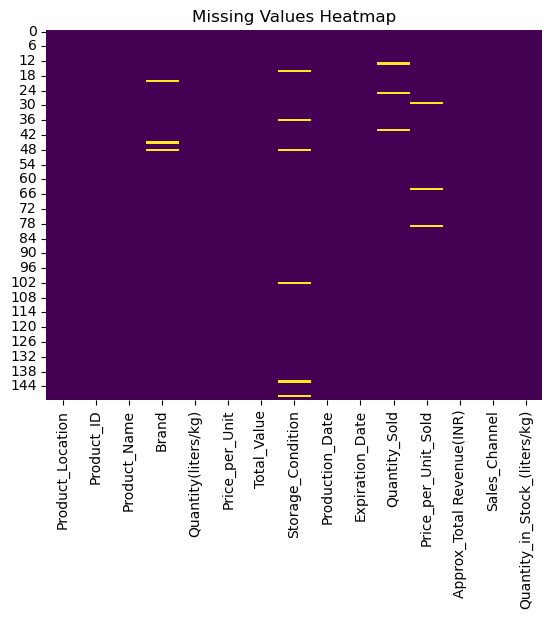

In [32]:
# Visualizing null values using heatmap

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [33]:
df.describe()

,Product_ID,Quantity(liters/kg),Price_per_Unit,Total_Value,Quantity_Sold,Price_per_Unit_Sold,Approx_Total Revenue(INR),Quantity_in_Stock_(liters/kg)
count,150.000000,150.000000,150.000000,150.000000,147.000000,147.000000,150.000000,150.000000
mean,5.166667,497.264333,58.222733,28141.585181,268.639456,58.238844,15128.786733,225.413333
std,2.997575,289.363745,25.374899,21557.013218,230.703924,25.914929,15822.426521,204.858805
min,1.000000,8.470000,11.580000,722.089200,1.000000,8.690000,58.090000,0.000000
25%,3.000000,253.152500,36.840000,10256.742750,77.000000,36.170000,3946.060000,48.000000
50%,5.000000,512.445000,58.265000,21891.722650,190.000000,60.150000,9408.025000,195.000000
75%,8.000000,723.707500,82.180000,41158.591300,415.000000,81.615000,21150.870000,348.000000
max,10.000000,999.780000,99.960000,91387.705500,956.000000,103.490000,66719.240000,929.000000


In [34]:
df['Quantity_Sold'].describe()

count    147.000000
mean     268.639456
std      230.703924
min        1.000000
25%       77.000000
50%      190.000000
75%      415.000000
max      956.000000
Name: Quantity_Sold, dtype: float64

In [35]:
df['Price_per_Unit_Sold'].describe()

count    147.000000
mean      58.238844
std       25.914929
min        8.690000
25%       36.170000
50%       60.150000
75%       81.615000
max      103.490000
Name: Price_per_Unit_Sold, dtype: float64

In [36]:
# Filling the numeric null values in dataset with mean imputation

df['Quantity_Sold'].fillna(df['Quantity_Sold'].mean(),inplace=True)
df['Price_per_Unit_Sold'].fillna(df['Price_per_Unit_Sold'].mean(),inplace=True)
df.isnull().sum()

Product_Location                 0
Product_ID                       0
Product_Name                     0
Brand                            3
Quantity(liters/kg)              0
Price_per_Unit                   0
Total_Value                      0
Storage_Condition                6
Production_Date                  0
Expiration_Date                  0
Quantity_Sold                    0
Price_per_Unit_Sold              0
Approx_Total Revenue(INR)        0
Sales_Channel                    0
Quantity_in_Stock_(liters/kg)    0
dtype: int64

In [37]:
df['Storage_Condition'].describe()

count              144
unique               2
top       Refrigerated
freq               108
Name: Storage_Condition, dtype: object

In [38]:
df['Brand'].describe()

count      147
unique       2
top       Amul
freq        84
Name: Brand, dtype: object

In [39]:
df['Brand'].mode()

0    Amul
Name: Brand, dtype: object

In [40]:
df['Storage_Condition'].mode()

0    Refrigerated
Name: Storage_Condition, dtype: object

In [41]:
# Filling the categorical null values in dataset with mode imputation

df['Brand'].fillna(df['Brand'].mode()[0],inplace=True)
df['Storage_Condition'].fillna(df['Storage_Condition'].mode()[0],inplace=True)
df.isnull().sum()

Product_Location                 0
Product_ID                       0
Product_Name                     0
Brand                            0
Quantity(liters/kg)              0
Price_per_Unit                   0
Total_Value                      0
Storage_Condition                0
Production_Date                  0
Expiration_Date                  0
Quantity_Sold                    0
Price_per_Unit_Sold              0
Approx_Total Revenue(INR)        0
Sales_Channel                    0
Quantity_in_Stock_(liters/kg)    0
dtype: int64

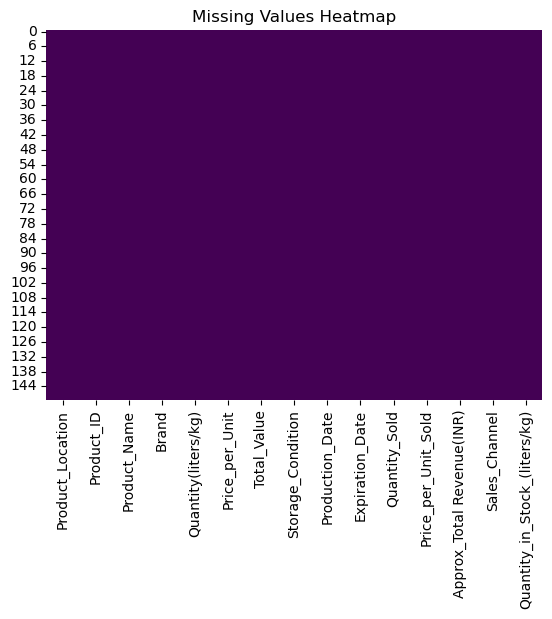

In [42]:
# Checking all null values are filled using heatmap

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [43]:
# Selecting based on general requirements

df.drop(['Product_ID'],axis=1,inplace=True)
df.drop(['Production_Date'],axis=1,inplace=True)
df.drop(['Expiration_Date'],axis=1,inplace=True)


In [44]:
df.head()

,Product_Location,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Quantity_Sold,Price_per_Unit_Sold,Approx_Total Revenue(INR),Sales_Channel,Quantity_in_Stock_(liters/kg)
0,Tamil Nadu,Ice Cream,Mother Dairy,222.40,85.72,19064.1280,Frozen,7.0,82.24,575.68,Wholesale,215
1,West Bengal,Milk,Amul,687.48,42.61,29293.5228,Refrigerated,558.0,39.24,21895.92,Wholesale,129
2,Tamil Nadu,Yogurt,Mother Dairy,503.48,36.50,18377.0200,Refrigerated,256.0,33.81,8655.36,Online,247
3,Tamil Nadu,Cheese,Amul,823.36,26.52,21835.5072,Frozen,601.0,28.92,17380.92,Online,222
4,Haryana,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,Refrigerated,145.0,83.07,12045.15,Retail,2


In [45]:
# EDA(Exploratory Data Analysis) using Pandas Profiling

from pandas_profiling import ProfileReport
profile=ProfileReport(df,title="Pandas Profiling Report")

In [46]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
# Preprocessing Task before model building
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Product_Location']=le.fit_transform(df['Product_Location'])
df['Product_Name']=le.fit_transform(df['Product_Name'])
df['Brand']=le.fit_transform(df['Brand'])
df['Storage_Condition']=le.fit_transform(df['Storage_Condition'])
df['Sales_Channel']=le.fit_transform(df['Sales_Channel'])
df.head()

,Product_Location,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Quantity_Sold,Price_per_Unit_Sold,Approx_Total Revenue(INR),Sales_Channel,Quantity_in_Stock_(liters/kg)
0,3,5,1,222.40,85.72,19064.1280,0,7.0,82.24,575.68,2,215
1,4,7,0,687.48,42.61,29293.5228,1,558.0,39.24,21895.92,2,129
2,3,9,1,503.48,36.50,18377.0200,1,256.0,33.81,8655.36,0,247
3,3,2,0,823.36,26.52,21835.5072,0,601.0,28.92,17380.92,0,222
4,1,1,1,147.77,83.85,12390.5145,1,145.0,83.07,12045.15,1,2


In [48]:
# Splitting our data into train and test

from sklearn.model_selection import train_test_split

X=df.drop('Approx_Total Revenue(INR)',axis=1)
y=df['Approx_Total Revenue(INR)']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.2)

In [49]:
X_train

,Product_Location,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Quantity_Sold,Price_per_Unit_Sold,Sales_Channel,Quantity_in_Stock_(liters/kg)
104,2,7,1,105.47,27.19,2867.7293,1,50.0,27.00,2,55
89,4,4,0,729.21,16.37,11937.1677,1,458.0,12.86,2,271
116,1,1,0,682.38,46.20,31525.9560,1,313.0,41.50,2,369
82,3,3,0,336.47,65.23,21947.9381,1,108.0,61.59,2,228
112,1,2,0,448.41,64.90,29101.8090,1,36.0,63.90,0,412
...,...,...,...,...,...,...,...,...,...,...,...
63,1,4,0,838.85,61.21,51346.0085,1,392.0,61.22,2,446
70,1,4,1,455.19,44.64,20319.6816,1,420.0,48.13,0,35
81,4,0,0,705.44,77.71,54819.7424,1,279.0,80.91,1,426
11,1,6,0,653.04,84.60,55247.1840,1,345.0,88.05,0,308


In [50]:
X_test

,Product_Location,Product_Name,Brand,Quantity(liters/kg),Price_per_Unit,Total_Value,Storage_Condition,Quantity_Sold,Price_per_Unit_Sold,Sales_Channel,Quantity_in_Stock_(liters/kg)
33,3,4,0,581.50,43.88,25516.2200,1,86.000000,41.490000,2,495
16,0,4,1,663.34,48.83,32390.8922,1,438.000000,52.790000,1,225
43,1,5,0,675.77,52.35,35376.5595,0,6.000000,54.410000,2,669
129,2,8,0,374.12,49.82,18638.6584,1,148.000000,51.770000,2,226
50,3,1,1,410.48,41.31,16956.9288,1,141.000000,43.020000,0,269
123,4,1,0,833.58,20.43,17030.0394,1,463.000000,16.510000,1,370
68,2,9,1,548.97,27.07,14860.6179,1,386.000000,25.290000,0,162
53,0,0,0,30.69,89.80,2755.9620,0,22.000000,92.230000,1,8
146,4,9,1,365.86,69.14,25295.5604,1,286.000000,65.310000,0,79
1,4,7,0,687.48,42.61,29293.5228,1,558.000000,39.240000,2,129


In [51]:
y_train

104     1350.00
89      5889.88
116    12989.50
82      6651.72
112     2300.40
         ...   
63     23998.24
70     20214.60
81     22573.89
11     30377.25
95     12360.29
Name: Approx_Total Revenue(INR), Length: 120, dtype: float64

In [52]:
y_test

33      3568.14
16     23122.02
43       326.46
129     7661.96
50      6065.82
123     7644.13
68      9761.94
53      2029.06
146    18678.66
1      21895.92
147    23605.75
32      6414.34
31      5424.16
122     8598.08
127     1609.09
74      6005.88
88       158.94
96      9167.85
42     63692.20
134    15719.40
80      3552.12
48     41096.40
90     11405.80
65      1491.52
97      5412.36
64     25637.34
93     28689.78
114    16840.71
25     56361.50
41      9768.72
Name: Approx_Total Revenue(INR), dtype: float64

In [53]:
# Standarization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [54]:
X_train_std

array([[ 0.00590497,  0.89131387,  1.18321596, ..., -1.25317491,
         1.36825105, -0.83519599],
       [ 1.42309876, -0.16072873, -0.84515425, ..., -1.81363133,
         1.36825105,  0.23586477],
       [-0.70269192, -1.21277133, -0.84515425, ..., -0.67844944,
         1.36825105,  0.721809  ],
       ...,
       [ 1.42309876, -1.5634522 , -0.84515425, ...,  0.88361475,
         0.15202789,  1.00445004],
       [-0.70269192,  0.540633  , -0.84515425, ...,  1.1666175 ,
        -1.06419526,  0.41933351],
       [ 1.42309876,  0.89131387, -0.84515425, ...,  0.68226265,
         0.15202789, -0.52776188]])

In [55]:
X_test_std

array([[ 0.71450187, -0.16072873, -0.84515425,  0.30362616, -0.5865793 ,
        -0.14000487,  0.55167728, -0.7947494 , -0.6788458 ,  1.36825105,
         1.34659444],
       [-1.41128881, -0.16072873,  1.18321596,  0.58539627, -0.3890633 ,
         0.17564943,  0.55167728,  0.71910821, -0.2309563 ,  0.15202789,
         0.0077685 ],
       [-0.70269192,  0.18995214, -0.84515425,  0.628192  , -0.24860747,
         0.31273796, -1.81265393, -1.13880795, -0.16674559,  1.36825105,
         2.20939339],
       [ 0.00590497,  1.24199473, -0.84515425, -0.41037046, -0.3495601 ,
        -0.45579184,  0.55167728, -0.52810403, -0.27138526,  1.36825105,
         0.01272711],
       [ 0.71450187, -1.21277133,  1.18321596, -0.28518521, -0.68912801,
        -0.53300937,  0.55167728, -0.55820915, -0.61820236, -1.06419526,
         0.22594754],
       [ 1.42309876, -1.21277133, -0.84515425,  1.17152215, -1.52228642,
        -0.52965245,  0.55167728,  0.8266265 , -1.66895906,  0.15202789,
         0.726

### Model Building


In [56]:
# LinearRegression Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_std,y_train)

LinearRegression()

In [57]:
Y_pred_lr=lr.predict(X_test_std)

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
print(r2_score(y_test,Y_pred_lr))
h1=mean_absolute_error(y_test,Y_pred_lr)
print(h1)
g1=mean_squared_error(y_test,Y_pred_lr)
print(g1)
score = r2_score(y_test,Y_pred_lr)
print("The accuracy of the model is {}%".format(round(score, 2) *100))

0.8158321311411573
3610.290759970679
43966520.5580716
The accuracy of the model is 82.0%


In [60]:
# Lasso Model

from sklearn.linear_model import Lasso 
ls=Lasso()
ls.fit(X_train_std,y_train)

C:\Users\Rakav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+08, tolerance: 3.013e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [61]:
Y_pred_ls=ls.predict(X_test_std)

In [62]:
print(r2_score(y_test,Y_pred_ls))
h2=mean_absolute_error(y_test,Y_pred_ls)
print(h2)
g2=mean_squared_error(y_test,Y_pred_ls)
print(g2)
score1 = r2_score(y_test,Y_pred_ls)
print("The accuracy of the model is {}%".format(round(score1, 2) *100))

0.8330249464114738
3525.013044916586
39862068.07829146
The accuracy of the model is 83.0%


In [63]:
# RandomForestRegression

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train_std,y_train)

RandomForestRegressor()

In [64]:
Y_pred_rfr=rfr.predict(X_test_std)

In [65]:
print(r2_score(y_test,Y_pred_rfr))
h3=mean_absolute_error(y_test,Y_pred_rfr)
print(h3)
g3=mean_squared_error(y_test,Y_pred_rfr)
print(g3)
score2 = r2_score(y_test,Y_pred_rfr)
print("The accuracy of the model is {}%".format(round(score2, 2) *100))

0.7619393436274949
3478.4040966666644
56832382.36574301
The accuracy of the model is 76.0%


In [66]:
# Ridge model

from sklearn.linear_model import Ridge
r=Ridge()
r.fit(X_train_std,y_train)

Ridge()

In [67]:
Y_pred_r=r.predict(X_test_std)

In [68]:
print(r2_score(y_test,Y_pred_r))
h4=mean_absolute_error(y_test,Y_pred_r)
print(h4)
g4=mean_squared_error(y_test,Y_pred_r)
print(g4)
score3 = r2_score(y_test,Y_pred_r)
print("The accuracy of the model is {}%".format(round(score3, 2) *100))

0.8840922651388735
3146.1586018305175
27670732.35514907
The accuracy of the model is 88.0%


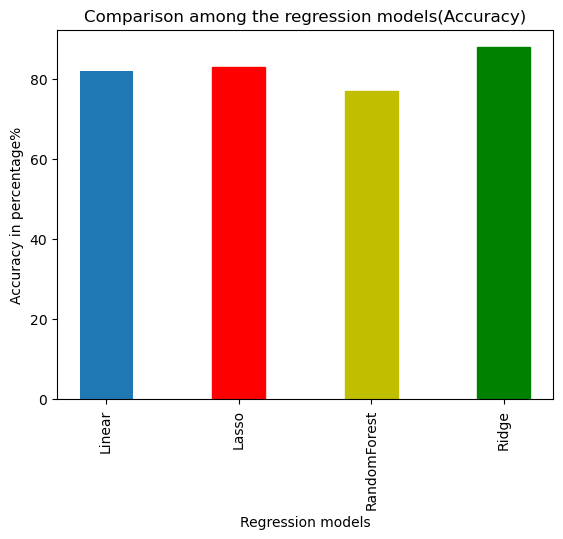

In [69]:
# comparison for all the models

data = {'Linear':82, 'Lasso':83, 'RandomForest':77,
        'Ridge':88}
models = list(data.keys())
accuracy = list(data.values())
barlist=plt.bar(models, accuracy,width = 0.4)
barlist[1].set_color('r')
barlist[2].set_color('y')
barlist[3].set_color('g')
plt.xlabel("Regression models")
plt.xticks(rotation=90)
plt.ylabel("Accuracy in percentage%")
plt.title("Comparison among the regression models(Accuracy)")
plt.show()



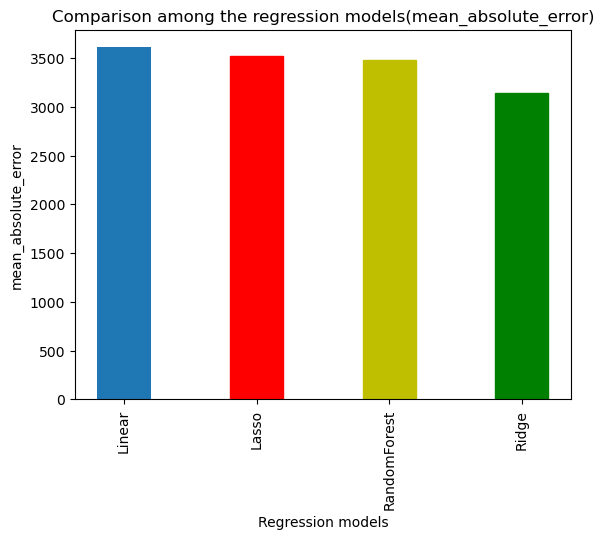

In [70]:
data = {'Linear':h1, 'Lasso':h2, 'RandomForest':h3,
        'Ridge':h4}
models = list(data.keys())
accuracy = list(data.values())
barlist=plt.bar(models, accuracy,width = 0.4)
barlist[1].set_color('r')
barlist[2].set_color('y')
barlist[3].set_color('g')
plt.xlabel("Regression models")
plt.xticks(rotation=90)
plt.ylabel("mean_absolute_error")
plt.title("Comparison among the regression models(mean_absolute_error)")
plt.show()

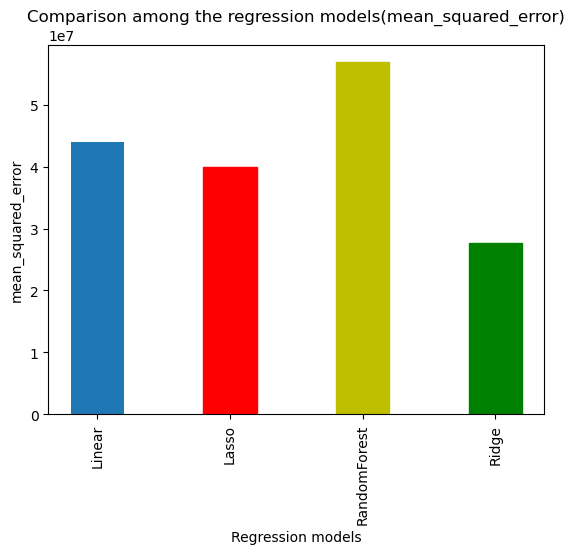

In [71]:
data = {'Linear':g1, 'Lasso':g2, 'RandomForest':g3,
        'Ridge':g4}
models = list(data.keys())
accuracy = list(data.values())
barlist=plt.bar(models, accuracy,width = 0.4)
barlist[1].set_color('r')
barlist[2].set_color('y')
barlist[3].set_color('g')
plt.xlabel("Regression models")
plt.xticks(rotation=90)
plt.ylabel("mean_squared_error")
plt.title("Comparison among the regression models(mean_squared_error)")
plt.show()